In [2]:
pwd

'/home/tim/work/su-thesis-project/projects/video_analysis/python/notebooks'

In [3]:
cd ..

/home/tim/work/su-thesis-project/projects/video_analysis/python


In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from sql_handling.execute_sql import execute_sql_pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy

# Paths

In [7]:
# path to save figures
output_path = '/home/tim/work/su-thesis-project/projects/video_analysis/python/notebooks/'

# Global configuration path
glob_conf_path = 'global_config.py'

# Load global variables

In [8]:
exec(open(glob_conf_path).read())

# Select data from DB

In [10]:
query = """SELECT filename,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r,
AU01_c,
AU02_c,
AU04_c,
AU05_c,
AU06_c,
AU07_c,
AU09_c,
AU10_c,
AU12_c,
AU14_c,
AU15_c,
AU17_c,
AU20_c,
AU23_c,
AU25_c,
AU26_c,
AU28_c,
AU45_c,
video_id,
mix,
emotion_1,
mode,
intensity_level,
version
FROM openface
WHERE mix = 0;"""
df = execute_sql_pandas(query)

In [11]:
df

,filename,success,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU25_c,AU26_c,AU28_c,AU45_c,video_id,mix,emotion_1,mode,intensity_level,version
0,A050121-R_adm_v_4,1,0.98,0.00,0.00,0.86,0.0,2.75,2.05,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,v,4,1
1,A050121-R_amu_p_1,1,0.98,0.00,0.00,0.94,0.0,1.76,1.90,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,amu,p,1,1
2,A050121-R_ang_p_4,1,0.98,0.00,0.00,1.31,0.0,0.68,0.44,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,ang,p,4,1
3,A050121-R_awe_p_3,1,0.98,0.00,0.00,0.73,0.0,1.71,0.87,0.00,...,0.0,0.0,0.0,1.0,A050121-R,0,awe,p,3,1
4,A050121-R_conc_v_3,1,0.98,0.87,0.00,2.27,0.0,0.28,2.63,0.47,...,0.0,0.0,0.0,1.0,A050121-R,0,conc,v,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183024,A205_neu_sit1_v,1,0.98,0.00,0.00,0.01,0.0,0.02,0.15,0.01,...,0.0,0.0,0.0,0.0,A205,0,neu,v,1,1
183025,A205_neu_sit1_v,1,0.98,0.00,0.01,0.01,0.0,0.04,0.19,0.01,...,0.0,0.0,0.0,0.0,A205,0,neu,v,1,1
183026,A205_neu_sit1_v,1,0.98,0.00,0.01,0.01,0.0,0.05,0.34,0.01,...,0.0,0.0,0.0,0.0,A205,0,neu,v,1,1
183027,A205_neu_sit1_v,1,0.98,0.00,0.01,0.00,0.0,0.04,0.34,0.01,...,0.0,0.0,0.0,0.0,A205,0,neu,v,1,1


Total number of instances: 183029

Number of Instances per File (before data cleaning)
A205_neu_sit1_v           937
A223_mix_ang_disg_3070    779
A205_rej_v_1              757
A223_env_v_4              752
A67_mix_disg_sad_3070     734
                         ... 
A337_ang_v_2               56
A67_dist_p_4               49
A337_neg_sur_v_1           48
A34_adm_v_1                44
A050121-R_fea_p_1          33
Name: filename, Length: 849, dtype: int64



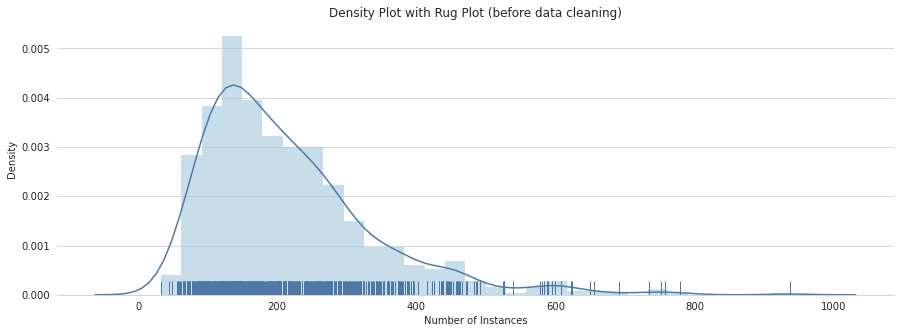


Number of Instances per Actor (before data cleaning)
A55          14454
A223         12763
A205         11530
A67           9257
A327          9066
A101          7836
A102          7764
A64           7317
A218          6304
A72           6301
A74           6297
A334          6241
A221          5961
A65           5702
A220          5498
A201          5269
A200          5187
A332          4653
A227          4609
A91           4147
A26           4124
A207          4122
A18           3969
A75           3893
A323          3245
A103          3154
A21           3105
A337          3031
A050121-R     2969
A303          2892
A34           2369
Name: video_id, dtype: int64


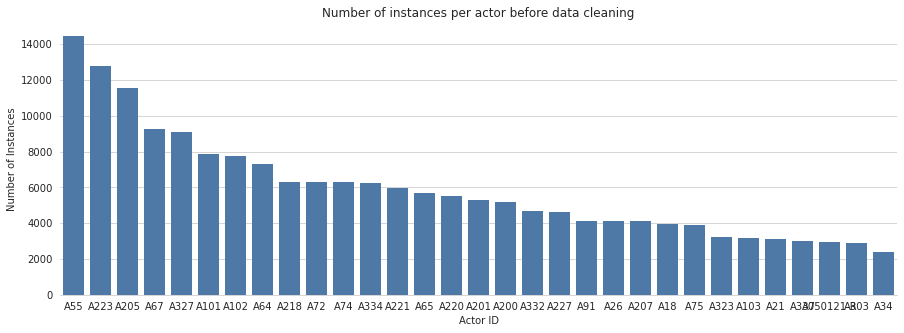


Number of Instances per Emotion (before data cleaning)
ang        10832
disg        7919
fea         7317
sad         6085
hap         5553
bor         5315
ele         5202
gra         5102
ple         5070
sex         4934
mov         4751
int         4717
sha         4604
reg         4393
conf        4345
env         4099
sat         4030
nos         3944
conc        3833
neg_sur     3811
neu         3791
hop         3783
ins         3709
det         3705
pos_sur     3685
scha        3642
dou         3615
tri         3564
dist        3558
awe         3514
disa        3486
anx         3442
pea         3298
adm         3260
ten         3010
cont        2976
exc         2926
gui         2859
pri         2827
rej         2816
amu         2797
rel         2476
sar         2264
emb         2170
Name: emotion_1, dtype: int64


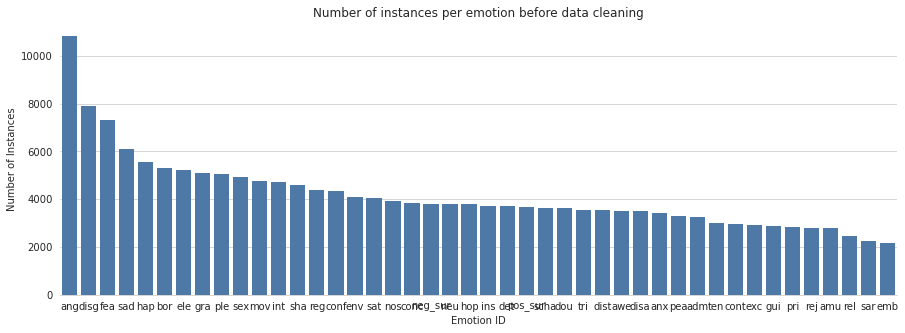


Number of Instances per Success Status (before data cleaning)
1    182170
0       859
Name: success, dtype: int64


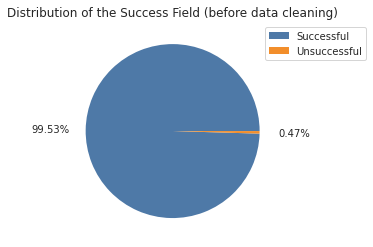


Percentage of Instances per Confidence Rate (before data cleaning)
0.00    0.000787
0.03    0.003032
0.12    0.000016
0.22    0.000049
0.28    0.000016
0.32    0.000011
0.38    0.000071
0.43    0.000071
0.47    0.000060
0.52    0.000055
0.57    0.000076
0.62    0.000186
0.68    0.000148
0.73    0.000164
0.77    0.000328
0.82    0.000481
0.88    0.017123
0.93    0.052565
0.98    0.924761
Name: confidence, dtype: float64


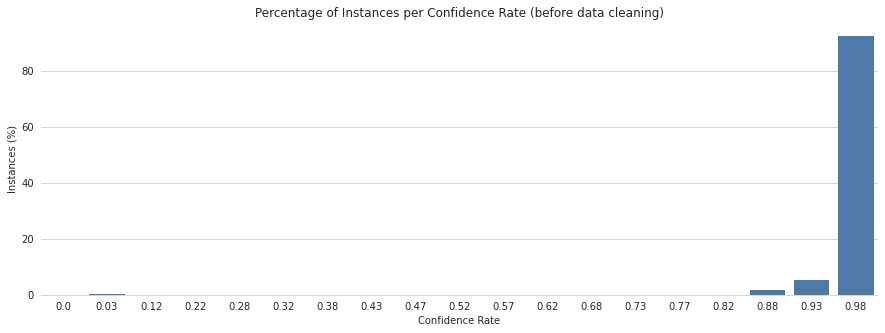

In [12]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Actor (before data cleaning)")
actor_val_counts_original = df["video_id"].value_counts()
print(actor_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(actor_val_counts_original.index, actor_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per actor before data cleaning")
plt.xlabel('Actor ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()


print("Number of Instances per Success Status (before data cleaning)")
success_val_counts_original = df["success"].value_counts()
print(success_val_counts_original)
plt.figure()
plt.pie(success_val_counts_original.values, autopct='%1.2f%%', pctdistance= 1.4, colors=palette_def)
plt.legend(['Successful','Unsuccessful'],bbox_to_anchor=(0.9, 1))
plt.savefig(os.path.join(output_path,'charts','report_success_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Distribution of the Success Field (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','success_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

print("Percentage of Instances per Confidence Rate (before data cleaning)")
confidence_val_counts_original = df["confidence"].value_counts(normalize=True).sort_index()
print(confidence_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(confidence_val_counts_original.index, 100*confidence_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.xlabel('Confidence Rate')
plt.ylabel('Instances (%)')
plt.savefig(os.path.join(output_path,'charts','report_confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Percentage of Instances per Confidence Rate (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()